In [1]:
# %matplotlib inline
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.style.use('seaborn-white')
import multiprocess as mp
import numpy as np
import pandas as pd
import bioframe
import cooltools
import cooler
#import bbi
from cooltools import snipping
import sys


/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


(3950, 19)
(13017, 19)
(22507, 19)


/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


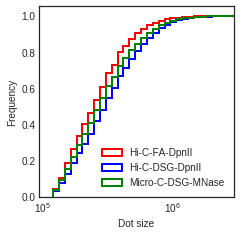

In [3]:
dot_file_FA ='/nl/umw_job_dekker/users/ba69w/HiC_Analysis/U54_deep/snakedots/U54-ESC4DN-FA-DpnII-R1-R2_hg38/combineddots/cloops_U54-ESC4DN-FA-DpnII-R1-R2_hg38.mapq_30.1000.mcool.combined.bedpe.postproc'
dot_file_DSG='/nl/umw_job_dekker/users/ba69w/HiC_Analysis/U54_deep/snakedots/U54-ESC4DN-DSG-DpnII-R1-R2_hg38/combineddots/cloops_U54-ESC4DN-DSG-DpnII-R1-R2_hg38.mapq_30.1000.mcool.combined.bedpe.postproc'
dot_file_MNase='/nl/umw_job_dekker/users/ba69w/HiC_Analysis/U54_deep/snakedots/U54-H1ESC4DN-FA-DSG-MNase-R1-R2_hg38/combineddots/cloops_U54-H1ESC4DN-FA-DSG-MNase-R1-R2_hg38.mapq_30.1000.mcool.combined.bedpe.postproc'

#dot_file_FA ='/nl/umw_job_dekker/users/ba69w/HiC_Analysis/U54_deep/snakedots/U54-HFFc6-FA-DpnII-R1-R2_hg38/combineddots/cloops_U54-HFFc6-FA-DpnII-R1-R2_hg38.mapq_30.1000.mcool.combined.bedpe.postproc'
#dot_file_DSG='/nl/umw_job_dekker/users/ba69w/HiC_Analysis/U54_deep/snakedots/U54-HFFc6-DSG-DpnII-R1-R2_hg38/combineddots/cloops_U54-HFFc6-DSG-DpnII-R1-R2_hg38.mapq_30.1000.mcool.combined.bedpe.postproc'
#dot_file_MNase='/nl/umw_job_dekker/users/ba69w/HiC_Analysis/U54_deep/snakedots/U54-HFFc6-FA-DSG-MNase-R1-R3.hg38/combineddots/cloops_U54-HFFc6-FA-DSG-MNase-R1-R3.hg38.mapq_30.1000.mcool.combined.bedpe.postproc'


ddd = [dot_file_FA,dot_file_DSG,dot_file_MNase]
lll = ['Hi-C-FA-DpnII','Hi-C-DSG-DpnII','Micro-C-DSG-MNase']
col=['r','b','g']
def dot_size_hist(dot_files,labels):
    resolution=10000
    plt.figure(figsize=(3.5 , 3.5))
    w=7
    s=(2*w-2)*resolution
    bins=np.geomspace(s,20000000,num=50)
    hist_keys = {"histtype":'step',
                 "cumulative":True,
                 "density":True,
                 "linewidth":2,}
    ax=plt.subplot(1,1,1)
    i=0
    for dot_file,label in zip(dot_files,labels):
        sites = pd.read_table(dot_file)
        # print(sites.head(6))
        dists=(sites['start2']-sites['start1'])
        #ax.set_xlim(0, 3000000)
        ax.hist(dists,bins=bins,color=col[i],label=label,**hist_keys)
        print(sites.shape)
        i=i+1

    ax.set_xscale('log')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Dot size')
    #plt.savefig('U54-HFF-DSG_dotsize.png')

    ax.set_xlim(0, 3000000)
    #plt.savefig('U54-HFF-DSG_dotsize.png')
    # plt.legend(loc="best")
    plt.legend(loc="lower right")



dot_size_hist(ddd,lll)
plt.savefig("Dotsize_ESC.pdf")

/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


(19210, 19)
(30403, 19)


/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


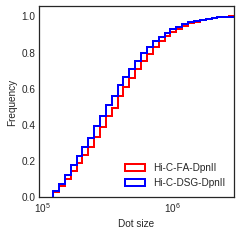

In [9]:
#dot_file_FA = "/nl/umw_job_dekker/users/ba69w/HiC_Analysis/U54_deep/snakedots/comp_dots/U54_ESC4DN_FA_DpnII_R1_R2_hg38_uniq_comp_to_U54_ESC4DN_DSG_DpnII_R1_R2_hg38.txt"
#dot_file_DSG = "/nl/umw_job_dekker/users/ba69w/HiC_Analysis/U54_deep/snakedots/comp_dots/U54_ESC4DN_DSG_DpnII_R1_R2_hg38_uniq_comp_to_U54_ESC4DN_FA_DpnII_R1_R2_hg38.txt"

#dot_file_FA ='/nl/umw_job_dekker/users/ba69w/HiC_Analysis/U54_deep/snakedots/U54-ESC4DN-FA-DpnII-R1-R2_hg38/combineddots/cloops_U54-ESC4DN-FA-DpnII-R1-R2_hg38.mapq_30.1000.mcool.combined.bedpe.postproc'
#dot_file_DSG='/nl/umw_job_dekker/users/ba69w/HiC_Analysis/U54_deep/snakedots/U54-ESC4DN-DSG-DpnII-R1-R2_hg38/combineddots/cloops_U54-ESC4DN-DSG-DpnII-R1-R2_hg38.mapq_30.1000.mcool.combined.bedpe.postproc'
#dot_file_MNase='/nl/umw_job_dekker/users/ba69w/HiC_Analysis/U54_deep/snakedots/U54-H1ESC4DN-FA-DSG-MNase-R1-R2_hg38/combineddots/cloops_U54-H1ESC4DN-FA-DSG-MNase-R1-R2_hg38.mapq_30.1000.mcool.combined.bedpe.postproc'

dot_file_FA ='/nl/umw_job_dekker/users/ba69w/HiC_Analysis/U54_deep/snakedots/U54-HFFc6-FA-DpnII-R1-R2_hg38/combineddots/cloops_U54-HFFc6-FA-DpnII-R1-R2_hg38.mapq_30.1000.mcool.combined.bedpe.postproc'
dot_file_DSG='/nl/umw_job_dekker/users/ba69w/HiC_Analysis/U54_deep/snakedots/U54-HFFc6-DSG-DpnII-R1-R2_hg38/combineddots/cloops_U54-HFFc6-DSG-DpnII-R1-R2_hg38.mapq_30.1000.mcool.combined.bedpe.postproc'
#dot_file_MNase='/nl/umw_job_dekker/users/ba69w/HiC_Analysis/U54_deep/snakedots/U54-HFFc6-FA-DSG-MNase-R1-R3.hg38/combineddots/cloops_U54-HFFc6-FA-DSG-MNase-R1-R3.hg38.mapq_30.1000.mcool.combined.bedpe.postproc'




ddd = [dot_file_DSG,dot_file_MNase]
lll = ['Hi-C-FA-DpnII','Hi-C-DSG-DpnII']
col=['r','b']
def dot_size_hist(dot_files,labels):
    resolution=10000
    plt.figure(figsize=(3.5 , 3.5))
    w=7
    s=(2*w-2)*resolution
    bins=np.geomspace(s,20000000,num=50)
    hist_keys = {"histtype":'step',
                 "cumulative":True,
                 "density":True,
                 "linewidth":2,}
    ax=plt.subplot(1,1,1)
    i=0
    for dot_file,label in zip(dot_files,labels):
        sites = pd.read_table(dot_file)
        # print(sites.head(6))
        dists=(sites['start2']-sites['start1'])
        #ax.set_xlim(0, 3000000)
        ax.hist(dists,bins=bins,color=col[i],label=label,**hist_keys)
        print(sites.shape)
        i=i+1

    ax.set_xscale('log')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Dot size')
    #plt.savefig('U54-HFF-DSG_dotsize.png')

    ax.set_xlim(0, 3000000)
    #plt.savefig('U54-HFF-DSG_dotsize.png')
    # plt.legend(loc="best")
    plt.legend(loc="lower right")



dot_size_hist(ddd,lll)
